In [25]:
#import librariers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.tree import DecisionTreeClassifier

In [26]:
#import dataset
data = pd.read_csv('Iris.csv')

In [27]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [28]:
data.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [29]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [30]:
#checking for null values
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [31]:
from sklearn.preprocessing import LabelEncoder

In [32]:
le = LabelEncoder()

In [45]:
data["Species"] = le.fit_transform(data["Species"])

In [46]:
#splitting dependent and independent variables
x = data.drop(["Species", "Id"], axis=1)
y = data["Species"]

In [47]:
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [48]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64

In [49]:
#splitting the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [50]:
#Using gini index
dt=DecisionTreeClassifier(criterion="gini", random_state=42)
model=dt.fit(x_train,y_train)

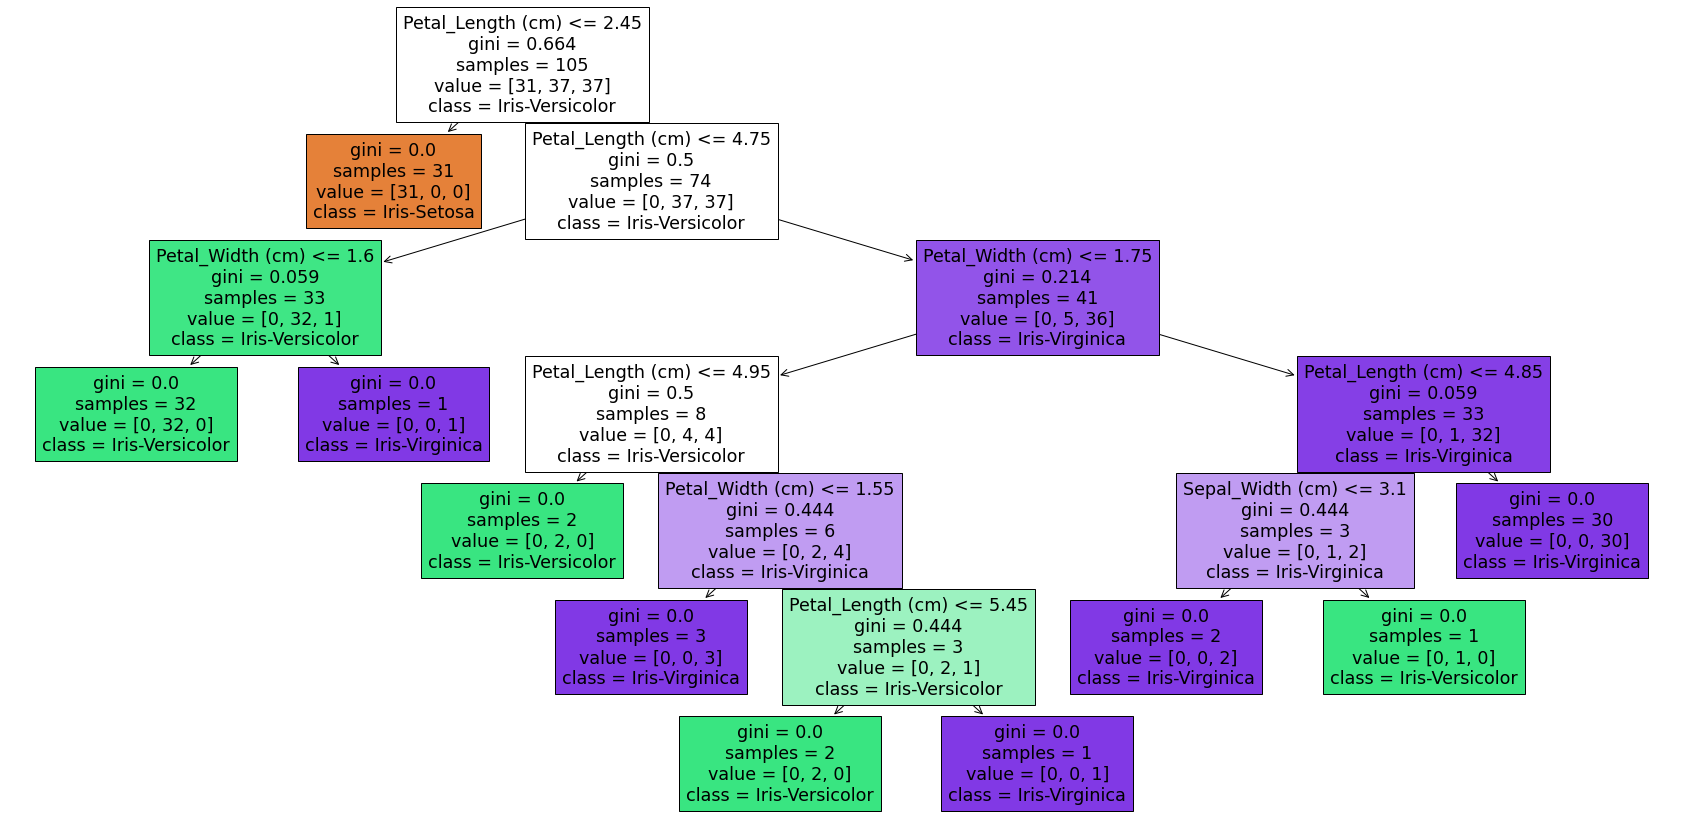

In [51]:
from sklearn import tree
plt.figure(figsize=(30,15))
dot_data = tree.plot_tree(dt,feature_names=['Sepal_Length (cm)','Sepal_Width (cm)','Petal_Length (cm)','Petal_Width (cm)'],class_names=['Iris-Setosa', 'Iris-Versicolor', 'Iris-Virginica'],
filled=True)

In [52]:
#accuracy and classification report
y_pred=model.predict(x_test)
print("\nConfusion Matrix : \n",confusion_matrix(y_test,y_pred))
print("\nAccuracy : ",accuracy_score(y_pred,y_test))
print("\nClassification report : \n",classification_report(y_pred,y_test))


Confusion Matrix : 
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Accuracy :  1.0

Classification report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [53]:
#Using entropy
dt=DecisionTreeClassifier(criterion="entropy", random_state=4)
model=dt.fit(x_train,y_train)

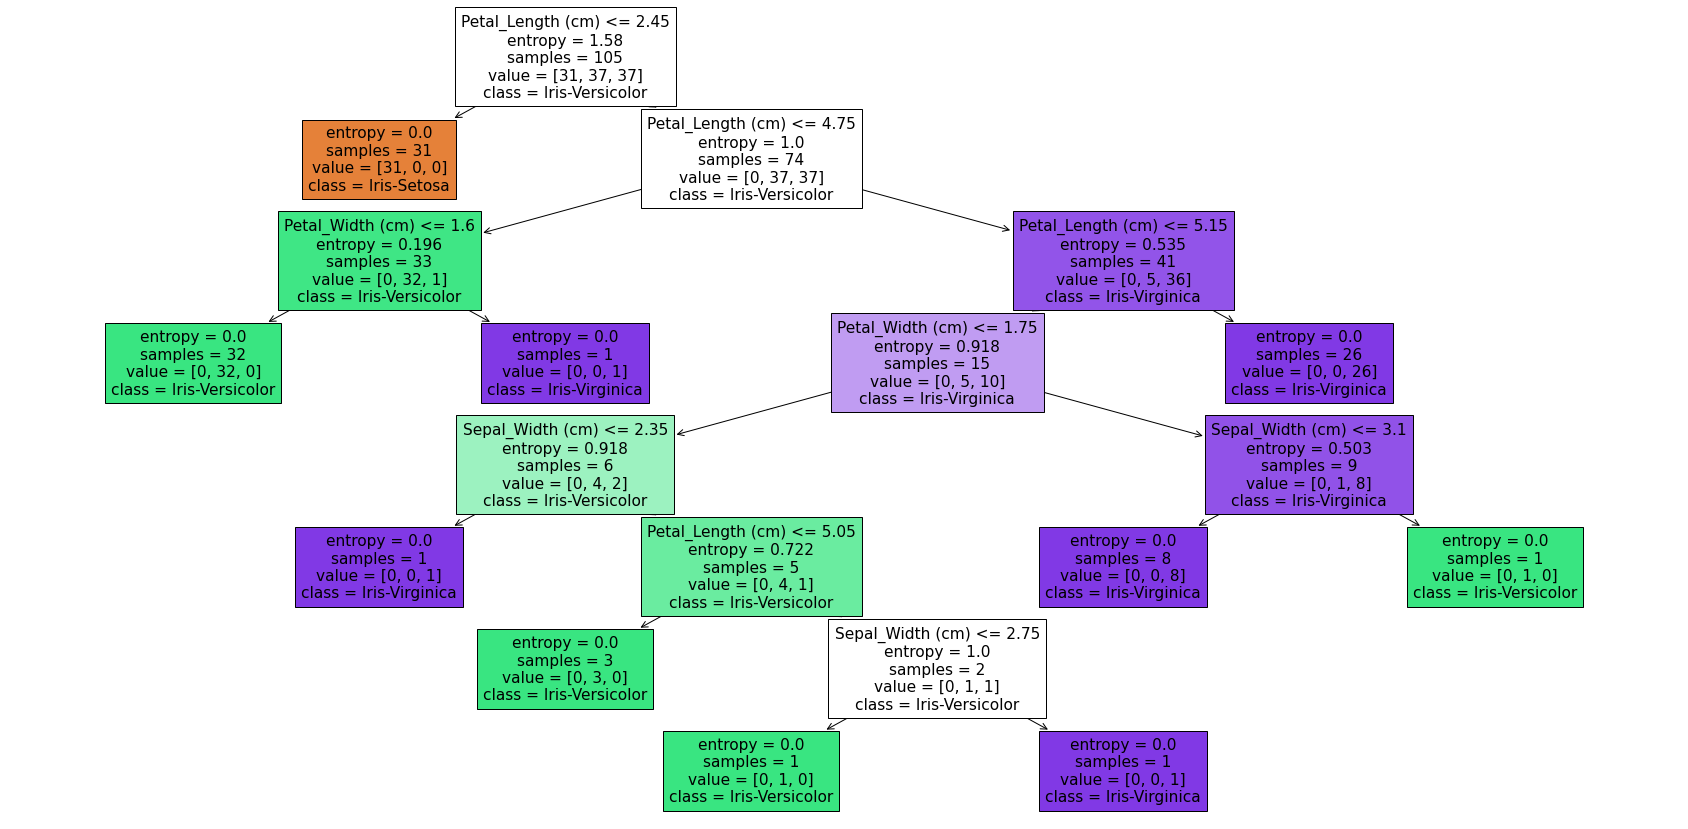

In [54]:
from sklearn import tree
plt.figure(figsize=(30,15))
dot_data = tree.plot_tree(dt,feature_names=['Sepal_Length (cm)','Sepal_Width (cm)','Petal_Length (cm)','Petal_Width (cm)'],class_names=['Iris-Setosa', 'Iris-Versicolor', 'Iris-Virginica'],
filled=True)
     

In [55]:
#accuracy and classification report
y_pred=model.predict(x_test)
print("\nConfusion Matrix : \n",confusion_matrix(y_test,y_pred))
print("\nAccuracy : ",accuracy_score(y_pred,y_test))
print("\nClassification report : \n",classification_report(y_pred,y_test))


Confusion Matrix : 
 [[19  0  0]
 [ 0 13  0]
 [ 0  1 12]]

Accuracy :  0.9777777777777777

Classification report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.93      0.96        14
           2       0.92      1.00      0.96        12

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.97        45
weighted avg       0.98      0.98      0.98        45

